In [10]:
%matplotlib inline

## 0. Imports

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np
import pickle
from PIL import Image
import matplotlib.image as mpimg
from  collections import Counter
from shutil import copyfile
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

## 1. Get data

In [3]:
#df_data = pd.read_excel(r"C:\Users\peter\Documents\GitHub\projects\Cortina\00. Data\Shoonic images.xlsm")

In [4]:
#df_data.to_pickle("shoonic_images_df.pickle")
df_data = pd.read_pickle("shoonic_images_df.pickle")

In [5]:
df_data.head()

,BrandCode,BrandCategory,ImagePerspective,ImageType,Season,Article,Colorcode,Color description,ProductGender,ProductCategory,ProductType,ProductStyle,ProductLast,ProductMould,Path
0,CORTINA,S,NaN,VISUAL,S18,395179,370,BLUE/NAVY,Men,Casual,Sport,Athletic,KEVIN,M1647,\Visual\big\CORTINA\395179-370.JPG
1,CORTINA,S,CTLG,PICTURE,S18,395179,370,BLUE/NAVY,Men,Casual,Sport,Athletic,KEVIN,M1647,\Photo\big\CORTINA\395179-370-CTLG.JPG
2,CORTINA,S,0000,PICTURE,S18,395179,370,BLUE/NAVY,Men,Casual,Sport,Athletic,KEVIN,M1647,\Photo\big\CORTINA\395179-370-0000.JPG
3,CORTINA,S,0001,PICTURE,S18,395179,370,BLUE/NAVY,Men,Casual,Sport,Athletic,KEVIN,M1647,\Photo\big\CORTINA\395179-370-0001.JPG
4,CORTINA,S,0002,PICTURE,S18,395179,370,BLUE/NAVY,Men,Casual,Sport,Athletic,KEVIN,M1647,\Photo\big\CORTINA\395179-370-0002.JPG


In [8]:
df_data[df_data["Article"]=="382869"]

,BrandCode,BrandCategory,ImagePerspective,ImageType,Season,Article,Colorcode,Color description,ProductGender,ProductCategory,ProductType,ProductStyle,ProductLast,ProductMould,Path
620615,CORTINA,S,NaN,VISUAL,W17,382869,SYL,YELLOW SD,Men,Casual,Low shoes,Lace,SACRAMENTO,M2308,\Visual\big\CORTINA\382869-SYL.JPG


First question:
- What is  the field 'ProductLast'?

## 2. Categories

### 2.1. Gender

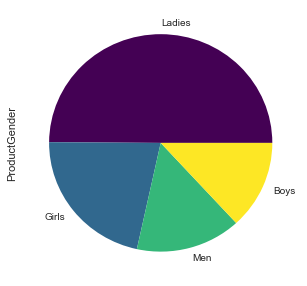

In [16]:
df_data["ProductGender"].value_counts().plot.pie(figsize=(5,5), colormap='viridis')

Notes:
- Men vs Boys and Girls vs Ladies might be tricky
- Class imbalance (represents the real-world though ;-) )

### 2.2. Category

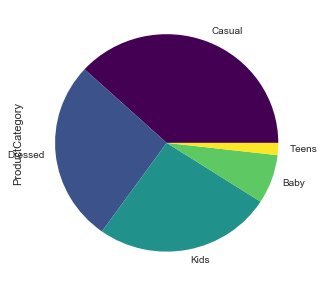

In [18]:
df_data["ProductCategory"].value_counts().plot.pie(figsize=(5,5), colormap='viridis')

In [21]:
df_data.groupby(["ProductGender", "ProductCategory"])["BrandCode"].agg("count")

ProductGender  ProductCategory
Boys           Baby                28037
               Kids                79747
               Teens               15964
Girls          Baby                40441
               Casual                 75
               Kids               162084
               Teens                 956
Ladies         Casual             235093
               Dressed            233391
Men            Casual             123105
               Dressed             20057
Name: BrandCode, dtype: int64

Findings:
- Overlapping categories
- Probably doesn't make sense to do this separately, since a Woman's Casual isn't gonna be closely correlated with a Man's Casual, but to check
- Kids vs Teens are gonna be tricky I think

In [39]:
basepath = r'E:\\Documents\\Freelance\\Projects\\Cortina\\Shoe classifier\\Data'

---- Men -- Casual ---


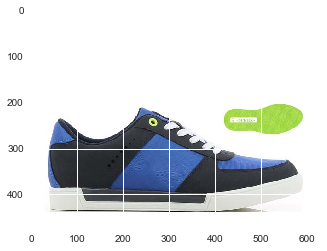

---- Men -- Dressed ---


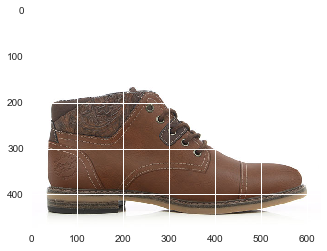

---- Boys -- Kids ---


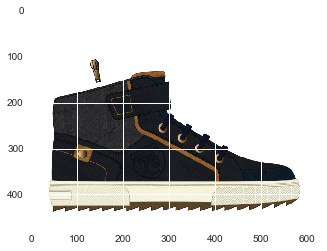

---- Boys -- Baby ---


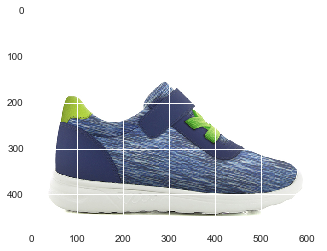

---- Boys -- Teens ---


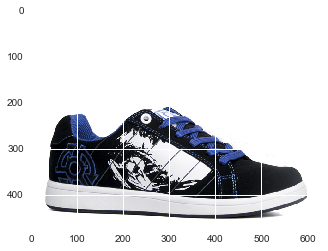

---- Girls -- Kids ---


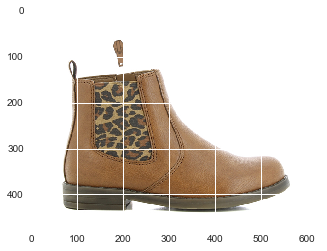

---- Girls -- Baby ---


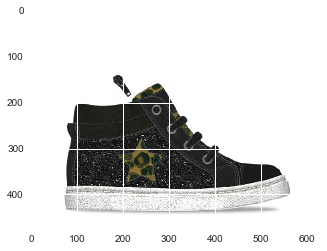

---- Girls -- Teens ---
no pics
---- Girls -- Casual ---
no pics
---- Ladies -- Dressed ---


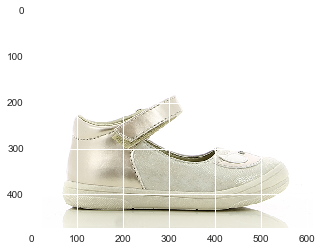

---- Ladies -- Casual ---


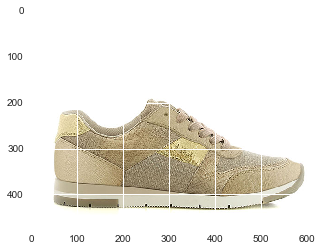

---- Ladies -- nan ---
no pics


In [48]:
for gender in df_data["ProductGender"].unique():
    for cat in df_data[df_data['ProductGender']==gender]["ProductCategory"].unique():
        img_path = df_data[(df_data['ProductGender']==gender) & (df_data['ProductCategory']==cat)& (df_data['ImageType']=="VISUAL")]['Path'].head(1).values
        print("---- {} -- {} ---".format(gender,cat))
        if len(img_path) > 0:
            path = basepath + img_path[0]

            img=mpimg.imread(path)
            imgplot = plt.imshow(img)
            plt.show()
        else:
            print("no pics")

In [50]:
df_data[(df_data['ProductGender']=="Ladies") & (df_data['ProductCategory']=="Dressed")& (df_data['ImageType']=="VISUAL")]

,BrandCode,BrandCategory,ImagePerspective,ImageType,Season,Article,Colorcode,Color description,ProductGender,ProductCategory,ProductType,ProductStyle,ProductLast,ProductMould,Path
404633,CORTINA,S,NaN,VISUAL,S17,324171,8N7,OILY SILVER/L.BLUE/L.BLUE,Ladies,Dressed,Sandals and Mules,Classic,EDELWEISS,P30W,\Visual\big\CORTINA\324171-8N7.JPG
435322,CORTINA,S,NaN,VISUAL,S17,338273,MRE,MULTI RED,Ladies,Dressed,Pumps,Classic,KHALIDA,P30,\Visual\big\CORTINA\338273-MRE.JPG
435348,CORTINA,S,NaN,VISUAL,S17,338273,MTB,MULTI T.BLUE,Ladies,Dressed,Pumps,Classic,KHALIDA,P30,\Visual\big\CORTINA\338273-MTB.JPG
466846,CORTINA,S,NaN,VISUAL,W17,345153,V64,BLACK/BLACK/BLACK/BLACK,Ladies,Dressed,Boots,Classic,QUETZAL,P30,\Visual\big\CORTINA\345153-V64.JPG
491227,CORTINA,S,NaN,VISUAL,W13,770822,BLK,BLACK,Ladies,Dressed,Booties,Classic,IVORY,P20,\Visual\big\CORTINA\770822-BLK.JPG
491404,CORTINA,S,NaN,VISUAL,W13,772581,BLK,BLACK,Ladies,Dressed,Boots,Classic,NOELIA,M0804,\Visual\big\CORTINA\772581-BLK.JPG
491455,CORTINA,S,NaN,VISUAL,W13,773432,DGR,DARK GREY,Ladies,Dressed,Boots,Classic,IRACA,P03,\Visual\big\CORTINA\773432-DGR.JPG
494473,CORTINA,S,NaN,VISUAL,S17,337919,NAV,NAVY,Ladies,Dressed,Sandals and Mules,Comfort/Eco,NENA,M2013,\Visual\big\CORTINA\337919-NAV.JPG
495081,CORTINA,S,NaN,VISUAL,W17,354823,CRU,E.D.GREY/PEWTER/E.D.GREY/E.D.GREY,Ladies,Dressed,Booties,Classic,ESTHER,P30WS,\Visual\big\CORTINA\354823-CRU.JPG
515148,CORTINA,S,NaN,VISUAL,W17,365403,210,BLACK/BLACK,Ladies,Dressed,Pumps,Classic,SWING,M2282,\Visual\big\CORTINA\365403-210.JPG


### 2.3. Style

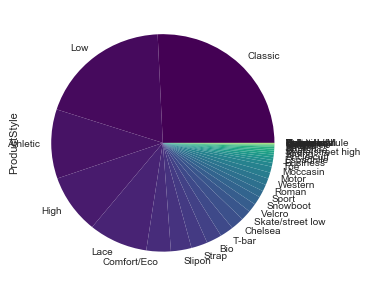

In [20]:
df_data["ProductStyle"].value_counts().plot.pie(figsize=(5,5), colormap="viridis")

In [6]:
df_data.groupby(["ProductGender", "ProductCategory", "ProductStyle"])["BrandCode"].agg("count")

ProductGender  ProductCategory  ProductStyle     
Boys           Baby             Athletic                52
                                Classic               3369
                                High                  7797
                                Lace                  1864
                                Low                   8681
                                Motor                    1
                                Sandal                 102
                                Slipon                 559
                                Snowboot               402
                                Sport                  560
                                Velcro                4650
               Kids             Animal                   1
                                Athletic              5596
                                Bio                    676
                                Boatshoe              1009
                                Chelsea                400
      

### 2.4. Type

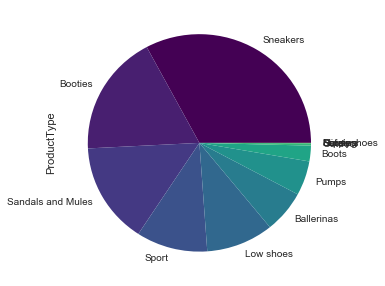

In [19]:
df_data["ProductType"].value_counts().plot.pie(figsize=(5,5), colormap='viridis')

### 2.5. Last

In [ ]:
df_data["ProductLast"].value_counts().plot.pie(figsize=(5,5))

### 2.6. Mould

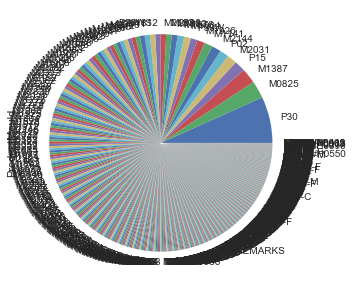

In [48]:
df_data["ProductMould"].value_counts().plot.pie(figsize=(5,5))

## 3. Multilabel correlation

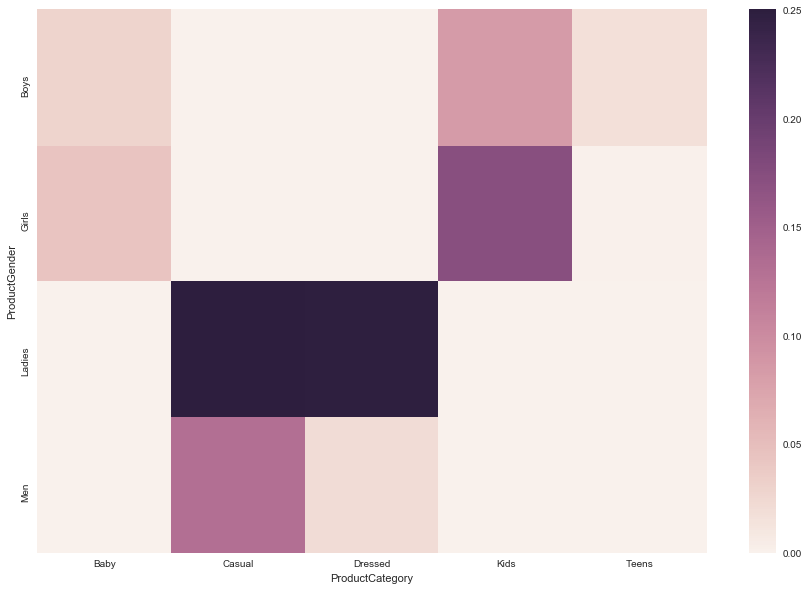

In [49]:
fig, ax = plt.subplots(figsize=(15,10)) 
df_crosstab = pd.crosstab(df_data["ProductGender"], df_data["ProductCategory"], normalize=True)
sns.heatmap(data=df_crosstab)

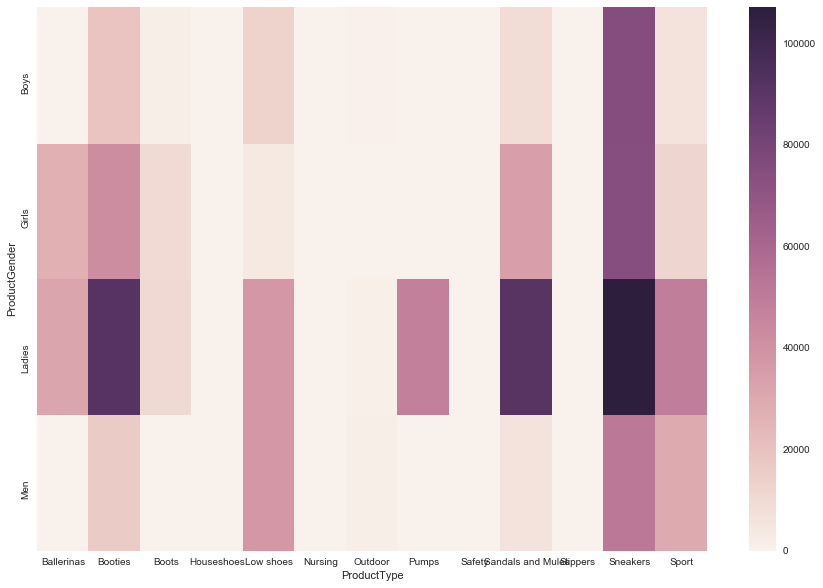

In [29]:
fig, ax = plt.subplots(figsize=(15,10)) 
df_crosstab = pd.crosstab(df_data["ProductGender"], df_data["ProductType"])
sns.heatmap(data=df_crosstab, )

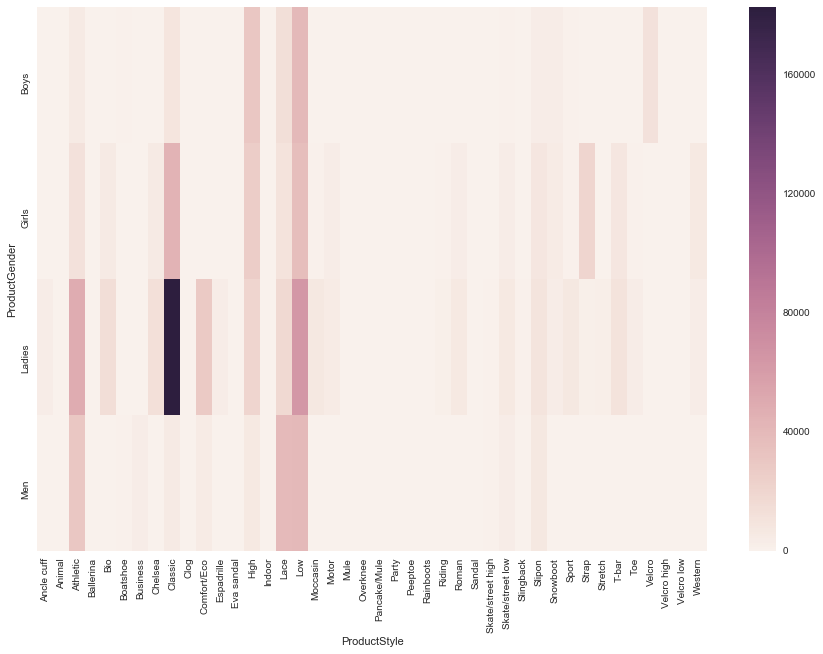

In [30]:
fig, ax = plt.subplots(figsize=(15,10))  
df_crosstab = pd.crosstab(df_data["ProductGender"], df_data["ProductStyle"])
sns.heatmap(data=df_crosstab)

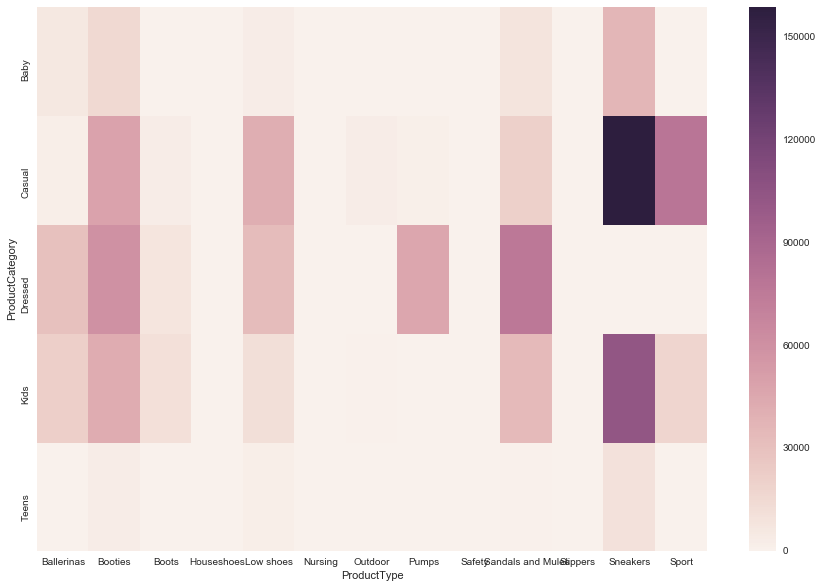

In [31]:
fig, ax = plt.subplots(figsize=(15,10)) 
df_crosstab = pd.crosstab(df_data["ProductCategory"], df_data["ProductType"])
sns.heatmap(data=df_crosstab)

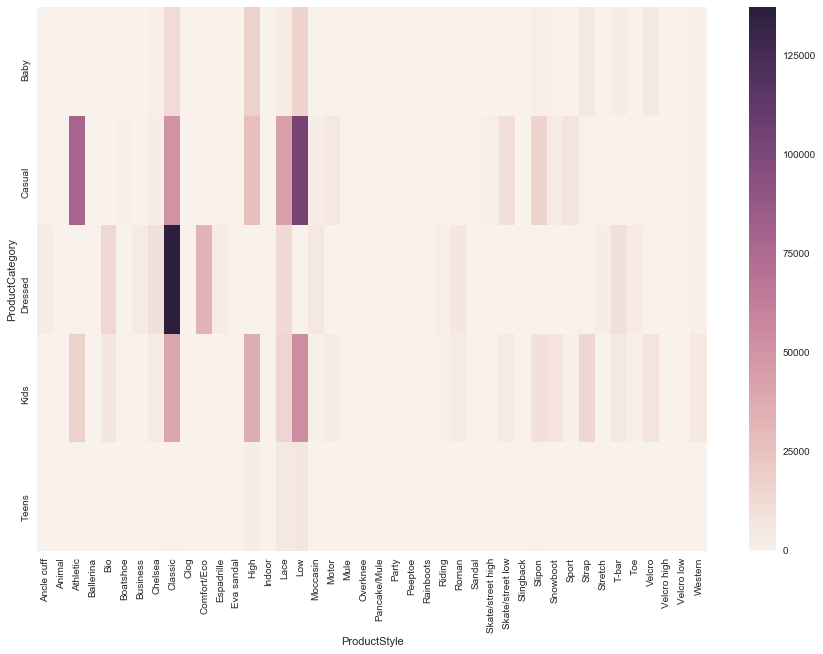

In [32]:
fig, ax = plt.subplots(figsize=(15,10)) 
df_crosstab = pd.crosstab(df_data["ProductCategory"], df_data["ProductStyle"])
sns.heatmap(data=df_crosstab)

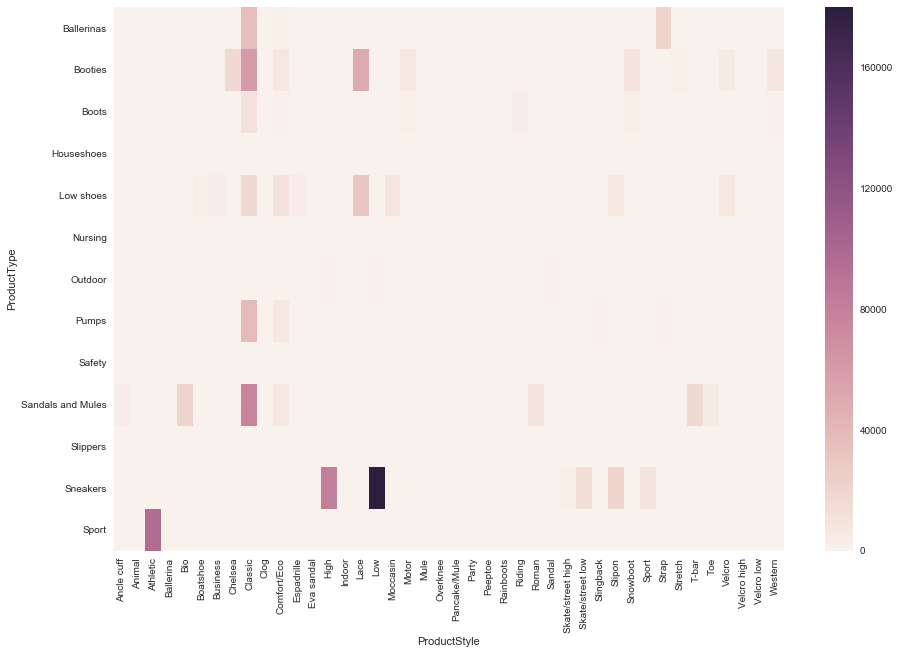

In [33]:
fig, ax = plt.subplots(figsize=(15,10))  
df_crosstab = pd.crosstab(df_data["ProductType"], df_data["ProductStyle"])
sns.heatmap(data=df_crosstab)

## 4. Dimensions

In [38]:
img_sizes = Counter([Image.open('E:\Documents\Freelance\Projects\Cortina\Shoe classifier\Data\{}'.format(str(i))).size for i in df_data[df_data["ImageType"]=="VISUAL"]['Path']])

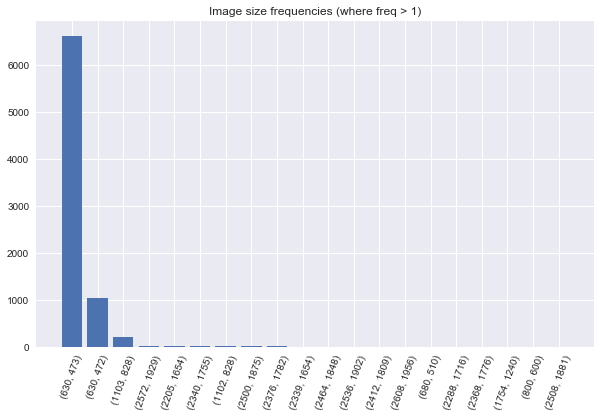

In [40]:
size, freq = zip(*Counter({i: v for i, v in img_sizes.items() if v > 1}).most_common(20))

plt.figure(figsize=(10, 6))

plt.bar(range(len(freq)), list(freq), align='center')
plt.xticks(range(len(size)), list(size), rotation=70)
plt.title("Image size frequencies (where freq > 1)")

plt.show()

So image resizing is gonna be required

## 5. Early test to see which one would work best

### 5.1. Product Type, - Gender and - Category

#### Segment into folders

In [125]:
def make_dirs(columnname):
    basedir = r"C:\\Users\peter\\Documents\\GitHub\\projects\\Cortina\\00. Data"
    
    directory = os.path.join(basedir, columnname)
    if not os.path.exists(directory):
        os.makedirs(directory)

    df_x_y = df_data[(~pd.isnull(df_data[columnname])) & (~pd.isnull(df_data["Path"])) & (df_data["ImageType"]=="VISUAL")][["Path",columnname]]

    X = df_x_y["Path"]
    y = df_x_y[columnname]

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=11)

    for train_index, test_index in sss.split(X, y):

        X_train = X.values[train_index]
        X_test = X.values[test_index]

        y_train = y.values[train_index]
        y_test = y.values[test_index]

        # Training data:
        directory = os.path.join(basedir, columnname, "train")
        if not os.path.exists(directory):
            os.makedirs(directory)

        for i, cat in enumerate(y_train):

            directory = os.path.join(basedir, columnname, "train", cat)
            if not os.path.exists(directory):
                os.makedirs(directory)

            pic = X_train[i]

            src = basedir + pic
            dest = os.path.join(basedir, columnname, "train", cat, pic[-14:])

            copyfile(src, dest)   

        for i, cat in enumerate(y_test):

            directory = os.path.join(basedir, columnname, "test", cat)
            if not os.path.exists(directory):
                os.makedirs(directory)

            pic = X_test[i]

            src = basedir + pic
            dest = os.path.join(basedir, columnname, "test", cat, pic[-14:])

            copyfile(src, dest) 



#### Split it up

In [126]:
for c in ["ProductGender","ProductType","ProductCategory"]:
    make_dirs(c)

#### Train and eval

In IDE

In [135]:
with open(r"C:\Users\peter\Documents\GitHub\projects\Cortina\01. Experiments\02. Classifiers\history_history.pickle","rb") as file:
    history_producttype = pickle.load(file)

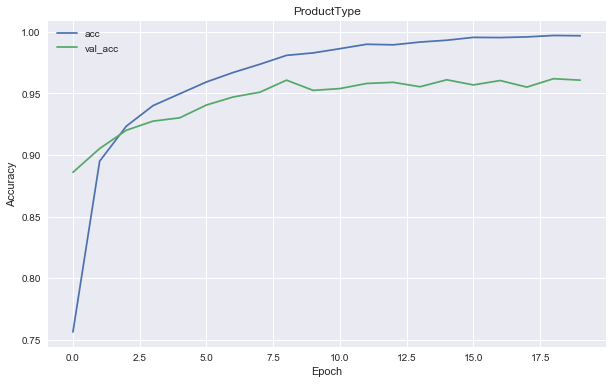

In [161]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(history_producttype["acc"]))), history_producttype["acc"], label="acc")
plt.plot(list(range(len(history_producttype["val_acc"]))), history_producttype["val_acc"], label="val_acc")
plt.title("ProductType")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [162]:
with open(r"C:\Users\peter\Documents\GitHub\projects\Cortina\01. Experiments\02. Classifiers\history_history_gender.pickle","rb") as file:
    history_productgender = pickle.load(file)

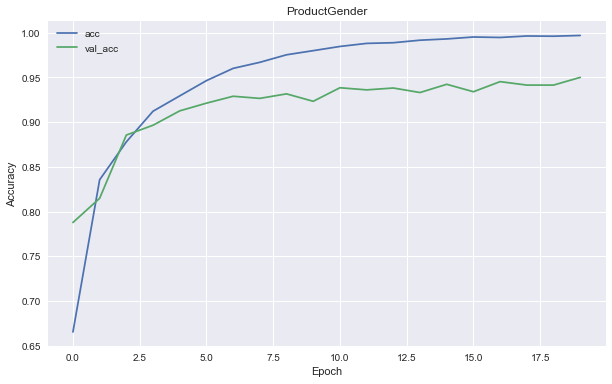

In [163]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(history_productgender["acc"]))), history_productgender["acc"], label="acc")
plt.plot(list(range(len(history_productgender["val_acc"]))), history_productgender["val_acc"], label="val_acc")
plt.title("ProductGender")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()